In [1]:

# Radiation Predictions

## IREM (Integral Radiation Monitor) 

#U9919, U9920, U9921 (electron, proton and dose) 

## RM (XMM Radiation Monitor) 

#MD016 MD019 (Low and high energy electrons) 

#notes:

#- Integral AOCS 

#AU5203 & AU5204 : FSS Alpha and Beta Angles 

#A5112 Star tracker background noise (ignore spikes as they are not real background measurements but artifacts from slews) 

#- XMM AOCS 

#A5203 & A5204 : FSS Roll (Alpha) and Pitch (Beta) Angles

#A5112 Star tracker background noise (ignore spikes as they are not real background measurements but artifacts from slews) 

#- Solar panels

#The solar array temperature are T0014 -T0020 for both spacecraft.


## Importing the necessary modules

In [2]:
# PANDAS     http://pandas.pydata.org
# easy-to-use data structures and data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# for plotting style only
import seaborn as sns
# Random Forest Regressor in Scikit-Learn.org
from sklearn.ensemble import RandomForestRegressor
import os
# Here we export the predefined connectors using the "*test" credentials
from dakit.databases.pymust import xmm_connector, int_connector

%matplotlib inline

/opt/jupyter/anaconda3/envs/deeplearning/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Get XMM data

## Get XMM Radiation Monitor data 

In [3]:
# XMM RM
tar_xmm = xmm_connector.getData("MD016", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )
#RM_high_elect_xmm = xmm_connector.getData("MD019", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )

## Get XMM AOCS data

In [4]:
# XMM AOCS
#FSS_aAngles_xmm = xmm_connector.getData("A5203", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )
#FSS_bAngles_xmm = xmm_connector.getData("A5204", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )
#star_Tr_bg_noise_xmm = xmm_connector.getData("A5112", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )

## Get XMM solar panels data

In [5]:
# Solar Panels for XMM
#Solar_PanelsT0014_xmm =  xmm_connector.getData("T0014", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )
#Solar_PanelsT0015_xmm =  xmm_connector.getData("T0015", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )
#Solar_PanelsT0016_xmm =  xmm_connector.getData("T0016", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )
#Solar_PanelsT0017_xmm =  xmm_connector.getData("T0017", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )
#Solar_PanelsT0018_xmm =  xmm_connector.getData("T0018", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )
#Solar_PanelsT0019_xmm =  xmm_connector.getData("T0019", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )
#Solar_PanelsT0020_xmm =  xmm_connector.getData("T0020", "2015-09-15 00:00:00", "2016-08-09 23:59:57", use_sec=True )

# Write data to .csv files

In [6]:
type(tar_xmm.data)
tar_xmm.data.to_csv('data/tar_xmm.csv', header=True )
print(tar_xmm.data.shape)

(6827093,)


In [7]:
print(tar_xmm.data.head())

datetime
2015-09-15 00:00:03    3.50
2015-09-15 00:00:07    3.50
2015-09-15 00:00:11    3.50
2015-09-15 00:00:15    2.25
2015-09-15 00:00:19    3.25
Name: MD016, dtype: float64


# Opening prepared context files

In [8]:
df_context_final = pd.read_csv('DF_CONTEXT_FINAL')
print(df_context_final.shape)

(6837460, 13)


In [9]:
# utc: added
df_context_final.head()

,utc,ROLL_ANGLE,RA_rad,DEC_rad,PA_rad,penumbra,umbra,rx,ry,rz,vx,vy,vz
0,2015-09-15 00:00:01,7.0,7.0,7.0,7.0,0,0,5046.551492,-44910.318286,-90911.653246,-0.105721,-0.707702,-1.176678
1,2015-09-15 00:00:04,7.0,7.0,7.0,7.0,0,0,5044.031336,-44910.430392,-90908.381151,-0.105661,-0.707711,-1.176777
2,2015-09-15 00:00:08,7.0,7.0,7.0,7.0,0,0,5040.671102,-44910.579627,-90904.017872,-0.105581,-0.707722,-1.176909
3,2015-09-15 00:00:12,7.0,7.0,7.0,7.0,0,0,5037.310836,-44910.728588,-90899.654039,-0.105501,-0.707734,-1.177041
4,2015-09-15 00:00:17,7.0,7.0,7.0,7.0,0,0,5033.110461,-44910.914405,-90894.198469,-0.105402,-0.707748,-1.177206


In [10]:
print(df_context_final.shape)

(6837460, 13)


In [11]:
# 
print(df_context_final.utc.values[0])
print(df_context_final.utc.values[-1])

2015-09-15 00:00:01
2016-08-09 23:59:57


In [12]:
df_context_final.min()

utc           2015-09-15 00:00:01
ROLL_ANGLE               -9.94774
RA_rad                 0.00163552
DEC_rad                  -23.0359
PA_rad                 0.00162031
penumbra                        0
umbra                           0
rx                       -26004.1
ry                       -45195.6
rz                        -112790
vx                      -0.845906
vy                      -0.797853
vz                       -3.70425
dtype: object

In [13]:
df_context_final.max()

utc           2016-08-09 23:59:57
ROLL_ANGLE                16.7307
RA_rad                          7
DEC_rad                   23.1567
PA_rad                          7
penumbra                     3640
umbra                        3504
rx                        52675.9
ry                        15605.1
rz                        11826.1
vx                        7.39601
vy                        4.86489
vz                        4.31112
dtype: object

# Opening target data: radiation RM

### Read telemetry from prepared CSV files (MUST dump)

In [14]:
#---------- RM were previously extracted to csv files from MUST database
DIR = '/home/jupyter/workspaces/missions/xmmintegral/data/' 

#print("This file full path")
#full_path = os.path.realpath('tar_xmm.csv')
#print(full_path + "\n")

%time df_tar_xmm = pd.read_csv(DIR + "tar_xmm.csv", index_col=[0])
df_tar_xmm = pd.read_csv(DIR + "tar_xmm.csv", index_col=[0])

CPU times: user 8.07 s, sys: 294 ms, total: 8.36 s
Wall time: 8.36 s


In [15]:
print(df_tar_xmm.head())

                     MD016
datetime                  
2015-09-15 00:00:03   3.50
2015-09-15 00:00:07   3.50
2015-09-15 00:00:11   3.50
2015-09-15 00:00:15   2.25
2015-09-15 00:00:19   3.25


In [16]:
df_tar_xmm.min()

MD016    0.0
dtype: float64

In [17]:
df_tar_xmm.max()

MD016    2.095792e+09
dtype: float64

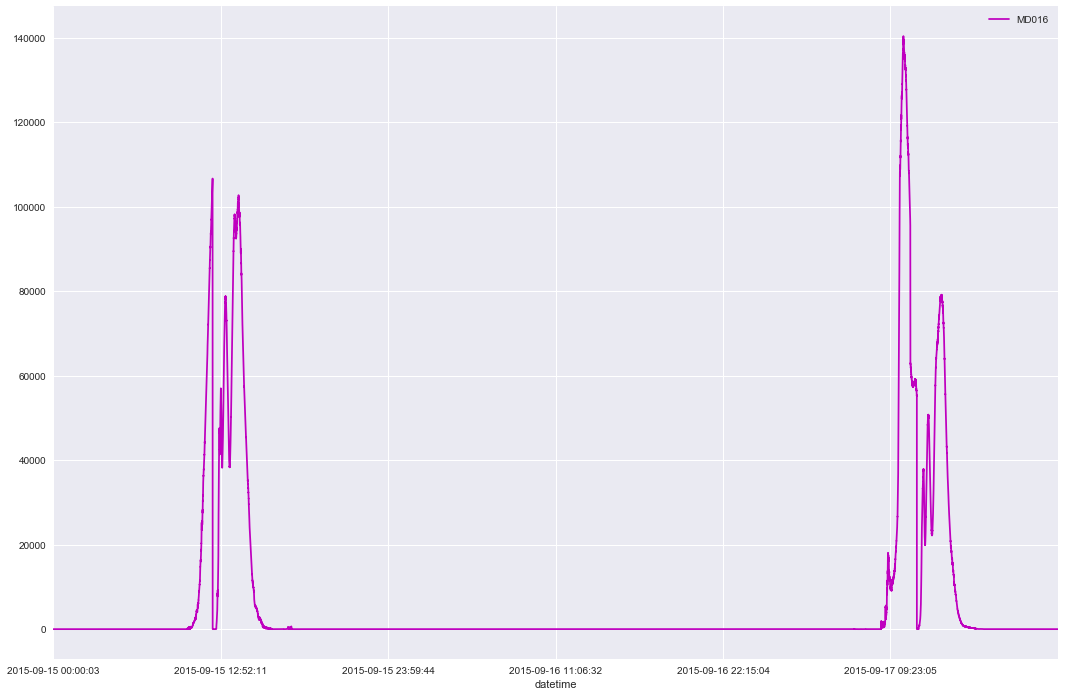

In [18]:
df_tar_xmm[0:60000].plot(figsize=(18,12),color='m')

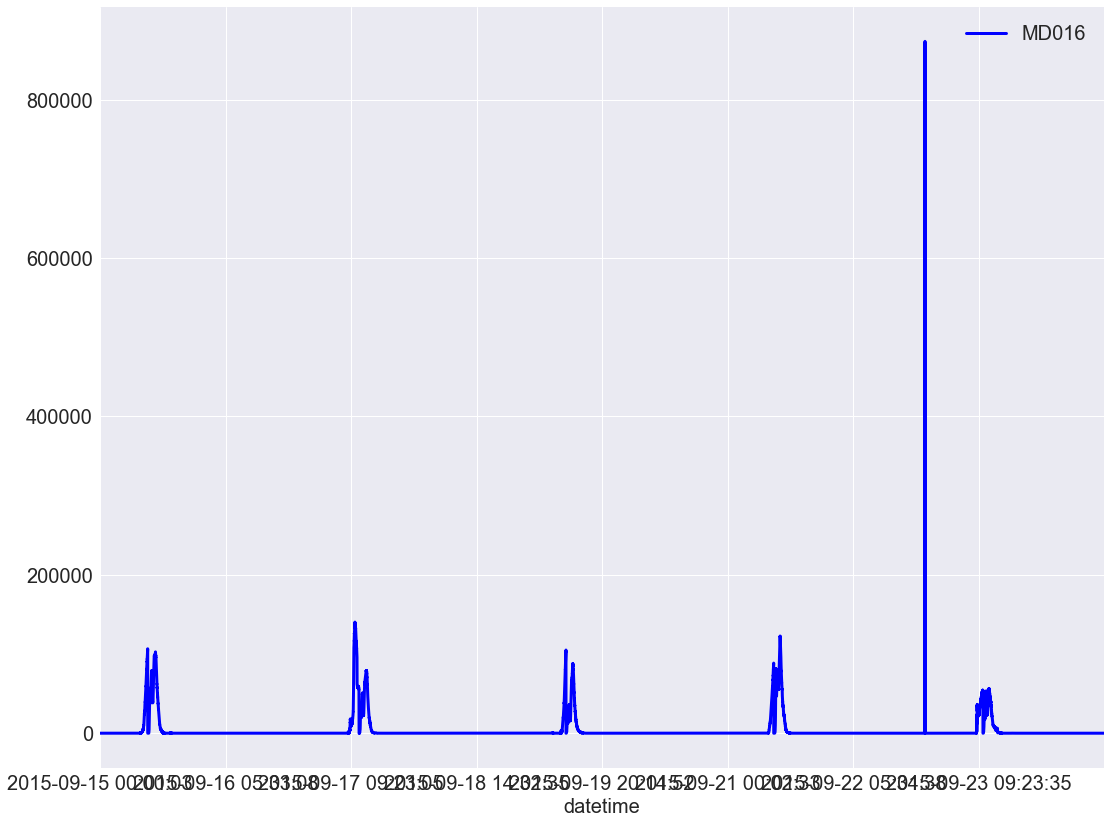

In [19]:
df_tar_xmm[0:200000].plot(figsize=(18,14), color='b', linewidth=3)
plt.xlabel('datetime', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(prop={'size': 20}, loc=1)

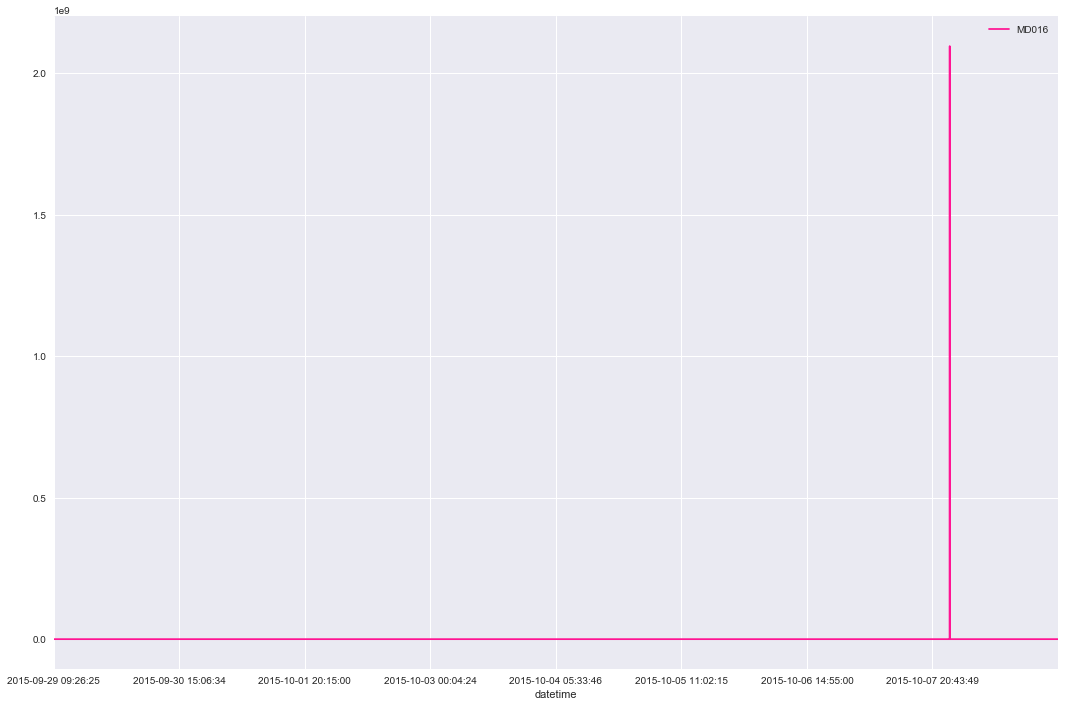

In [20]:
df_tar_xmm[300000:500000].plot(figsize=(18,12), color='deeppink')

In [21]:
print(tar_xmm.data.head())

datetime
2015-09-15 00:00:03    3.50
2015-09-15 00:00:07    3.50
2015-09-15 00:00:11    3.50
2015-09-15 00:00:15    2.25
2015-09-15 00:00:19    3.25
Name: MD016, dtype: float64


### Transforming the time format for convenience

In [22]:
#---------- Transform ms unix time into readable still machine-intepretable format
# to pandas 
df_tar_xmm.index = pd.to_datetime(df_tar_xmm.index) # , unit='ms')
#df_tar_xmm.index = pd.to_datetime(df_tar_xmm.index)

print("After time index transformation "+str(df_tar_xmm.index[0])+"  ---  type("+str(type(df_tar_xmm.index[0]))+")")

After time index transformation 2015-09-15 00:00:03  ---  type(<class 'pandas._libs.tslib.Timestamp'>)


### Some checks

In [23]:
df_tar_xmm.tail()

,MD016
datetime,
2016-08-09 23:59:39,4.75
2016-08-09 23:59:42,3.75
2016-08-09 23:59:46,6.00
2016-08-09 23:59:50,5.25
2016-08-09 23:59:55,3.25


# Last data preparation

In [24]:
resampled_context = df_context_final.copy()
resampled_context['utc'] = pd.to_datetime(resampled_context['utc'])
resampled_context = resampled_context.set_index('utc')
resampled_context = resampled_context.resample('15min').pad()
resampled_context.head()

,ROLL_ANGLE,RA_rad,DEC_rad,PA_rad,penumbra,umbra,rx,ry,rz,vx,vy,vz
utc,,,,,,,,,,,,
2015-09-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-15 00:15:00,7.0,7.0,7.0,7.0,0.0,0.0,4290.602909,-44936.959115,-89917.093742,-0.087503,-0.710218,-1.206550
2015-09-15 00:30:00,7.0,7.0,7.0,7.0,0.0,0.0,3532.455066,-44949.390255,-88892.937267,-0.068725,-0.712579,-1.236904
2015-09-15 00:45:00,7.0,7.0,7.0,7.0,0.0,0.0,2773.156517,-44947.163981,-87839.795590,-0.049380,-0.714773,-1.267731
2015-09-15 01:00:00,7.0,7.0,7.0,7.0,0.0,0.0,2012.928197,-44929.847612,-86757.165229,-0.029435,-0.716790,-1.299053


In [25]:
print(resampled_context.shape)

(31680, 12)


In [26]:
resampled_context.tail()

,ROLL_ANGLE,RA_rad,DEC_rad,PA_rad,penumbra,umbra,rx,ry,rz,vx,vy,vz
utc,,,,,,,,,,,,
2016-08-09 22:45:00,-0.122576,4.119474,20.34174,5.46417,0.0,0.0,49631.760186,-12118.957388,-69321.759256,-0.725543,0.434286,1.608356
2016-08-09 23:00:00,-0.122576,4.119474,20.34174,5.46417,0.0,0.0,49650.814977,-12754.998134,-70809.376275,-0.734198,0.413110,1.566555
2016-08-09 23:15:00,-0.122576,4.119474,20.34174,5.46417,0.0,0.0,49645.866748,-13384.874896,-72262.766654,-0.742132,0.392654,1.525820
2016-08-09 23:30:00,-0.122576,4.119474,20.34174,5.46417,0.0,0.0,49617.935735,-14008.557407,-73682.708892,-0.749400,0.372872,1.486088
2016-08-09 23:45:00,-0.122576,4.119474,20.34174,5.46417,0.0,0.0,49568.039942,-14625.338901,-75068.414251,-0.756043,0.353740,1.447343


(31680, 13)


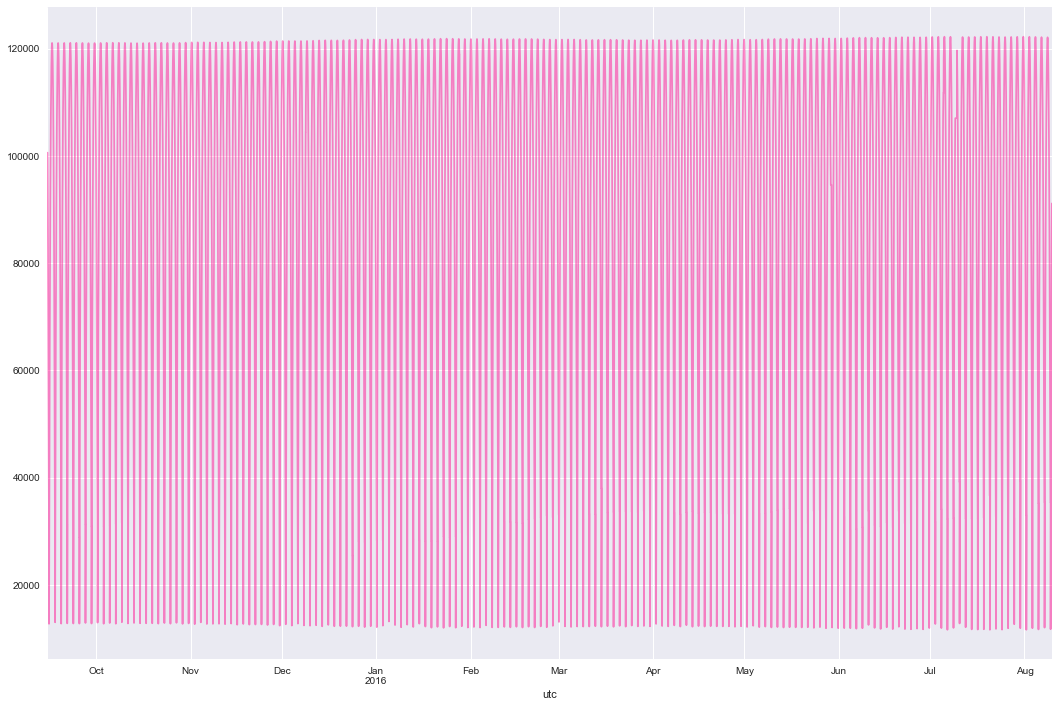

In [27]:
resampled_context['pseudo_altitude'] = np.sqrt(resampled_context['rx']**2 + resampled_context['ry']**2 + resampled_context['rz']**2) 
print(resampled_context.shape)
resampled_context['pseudo_altitude'].plot(figsize=(18,12), color='deeppink', alpha=0.5)

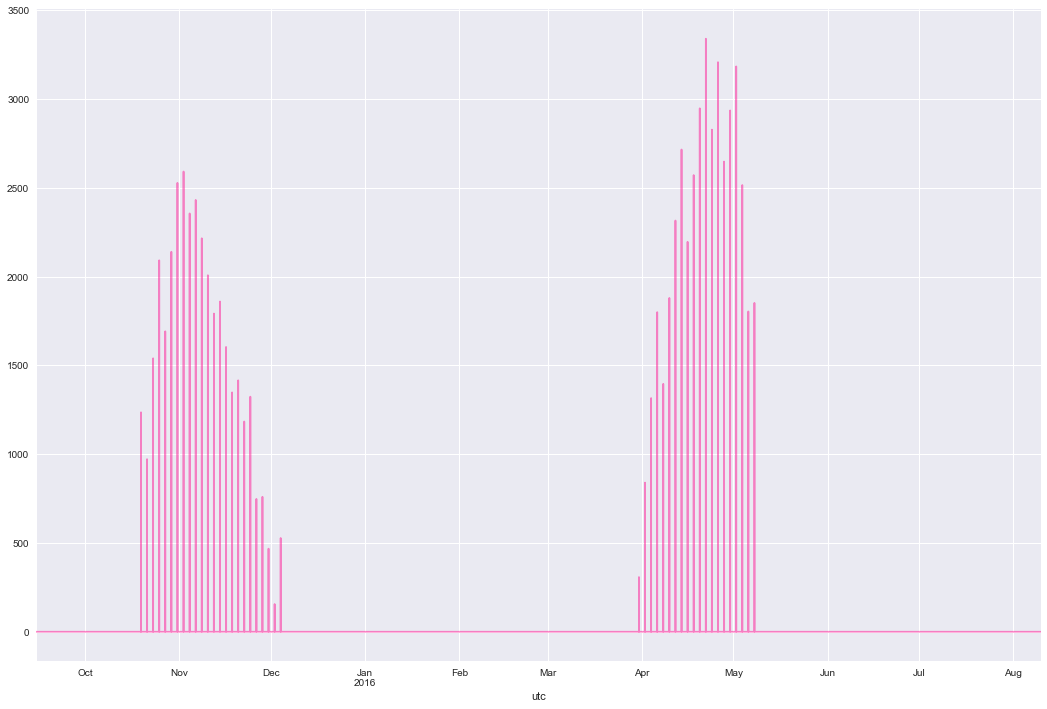

In [28]:
resampled_context['umbra'].plot(figsize=(18,12), color='deeppink', alpha=0.5)

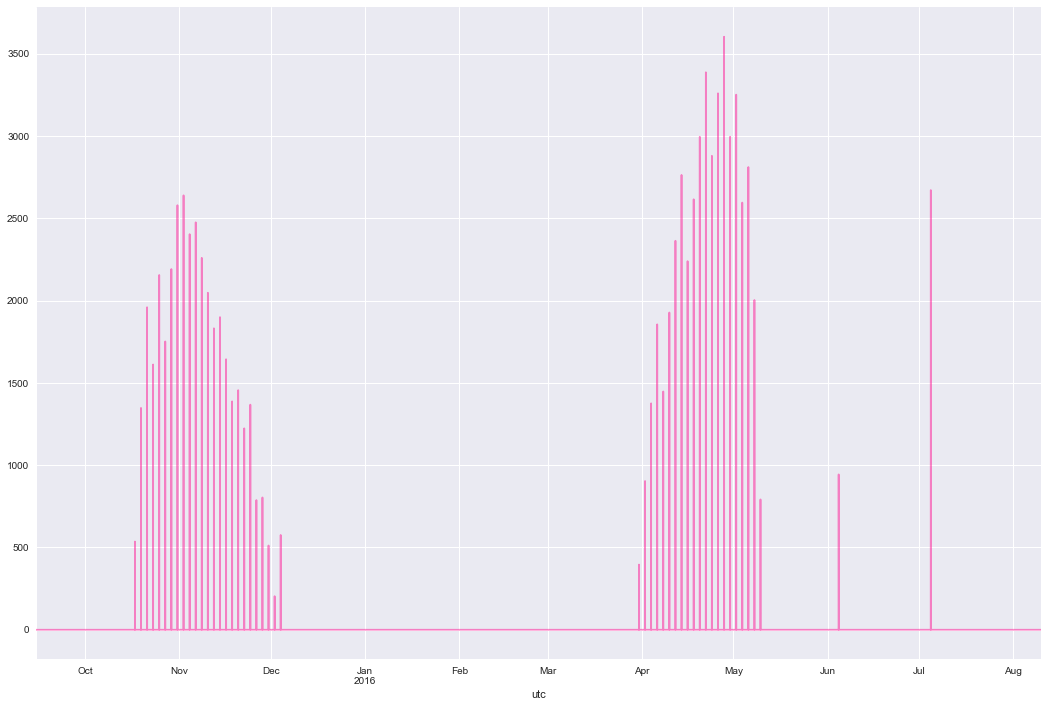

In [29]:
resampled_context['penumbra'].plot(figsize=(18,12), color='deeppink', alpha=0.5)

In [30]:
df_target = df_tar_xmm.resample('15min').pad()
print(df_tar_xmm.shape)
print(df_target.shape)
df_target.head()

(6827093, 1)
(31680, 1)


,MD016
datetime,
2015-09-15 00:00:00,NaN
2015-09-15 00:15:00,1.50
2015-09-15 00:30:00,1.75
2015-09-15 00:45:00,3.75
2015-09-15 01:00:00,3.00


In [31]:
df_target.tail()

,MD016
datetime,
2016-08-09 22:45:00,3.25
2016-08-09 23:00:00,4.00
2016-08-09 23:15:00,3.25
2016-08-09 23:30:00,4.00
2016-08-09 23:45:00,3.25


# Machine Learning

In [32]:
training_idx = (resampled_context.index >= '2015-10-17 07:46:00') & (resampled_context.index <= '2016-04-02 10:40:00')
training_idx2 = (resampled_context.index >= '2016-04-17 07:46:00') & (resampled_context.index <= '2016-05-02 10:40:00')
predict_idx  = (resampled_context.index >= '2016-04-06 00:00:00') & (resampled_context.index <= '2016-05-09 23:59:00')

## Training

In [33]:
rf = RandomForestRegressor(n_estimators=300, n_jobs=-1, min_samples_leaf=20)

modified_target = df_target[training_idx].copy()
modified_target['MD016'][modified_target['MD016'] > 10000] = 10000

#use_for_modelling=['pseudo_altitude']
#resampled_context = resampled_context[use_for_modelling]

# Build a forest of trees from the training set (X, y).
rf.fit(resampled_context[training_idx], modified_target)

/opt/jupyter/anaconda3/envs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [34]:
# Apply trees in the forest to X, return leaf indices
#rf.apply(resampled_context[predict_idx].tail())

In [35]:
# Return the decision path (of a sample, which sample?)in the forest: Return a node indicator matrix where 
#    non zero elements indicates that the samples goes through the nodes
#rf.decision_path(resampled_context[predict_idx])

## Predicting

In [36]:
# Predict regression target for X.
prediction = rf.predict(resampled_context[predict_idx])
print(prediction.shape)
print(resampled_context[predict_idx].shape)

(3264,)
(3264, 13)


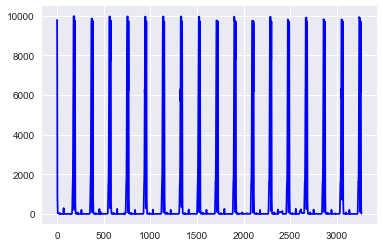

In [37]:
plt.plot(prediction, color='blue')

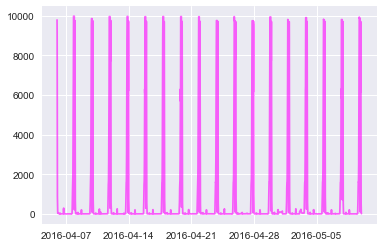

In [38]:
F = plt.figure() 
plt.plot(resampled_context[predict_idx].index, prediction, figure=F, alpha=0.6, color='fuchsia')

In [39]:
print(prediction.shape)
print(df_target[predict_idx].shape)
print(df_target[predict_idx].head())

(3264,)
(3264, 1)
                       MD016
datetime                    
2016-04-06 00:00:00  49820.0
2016-04-06 00:15:00  39356.0
2016-04-06 00:30:00   5479.5
2016-04-06 00:45:00      5.5
2016-04-06 01:00:00      3.5


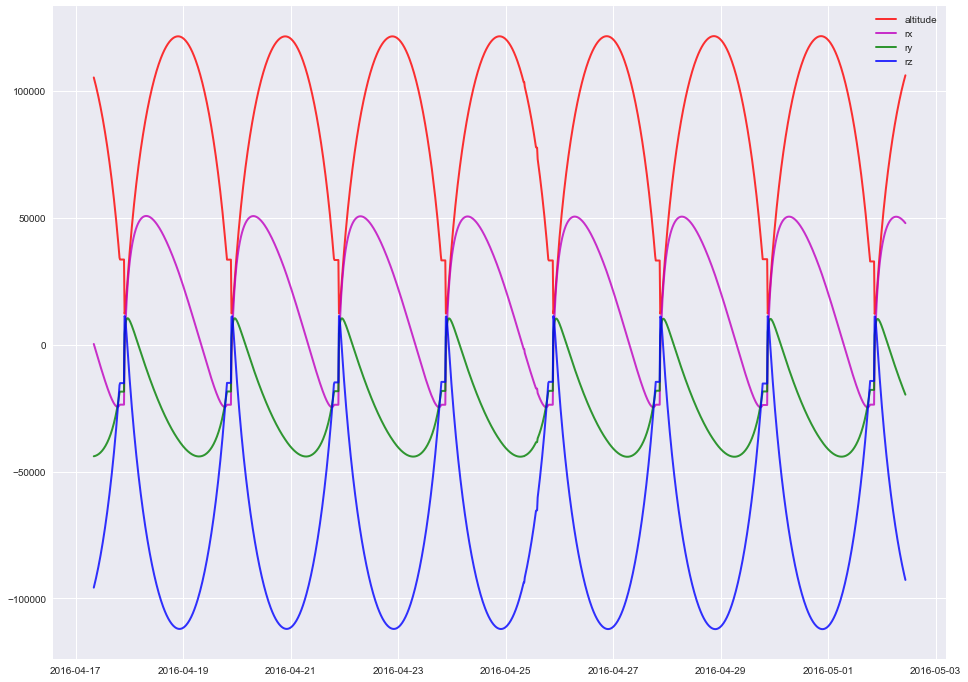

In [40]:
F = plt.figure(figsize = (16,12)) 
plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['pseudo_altitude']/1, label='altitude',alpha = 0.8, color='r', linewidth=2, figure=F)
plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['rx'], label='rx',alpha = 0.8, color='m', linewidth=2, figure=F)
plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['ry'], label='ry',alpha = 0.8, color='g', linewidth=2, figure=F)
plt.plot(resampled_context[training_idx2].index,resampled_context[training_idx2]['rz'], label='rz',alpha = 0.8, color='b', linewidth=2, figure=F)
#plt.plot(resampled_context[training_idx2].index,resampled_target[training_idx2].values[:,0], label='target U9921',alpha = 0.4, color='blue', linewidth=2, figure=F)
plt.legend()

In [41]:
F.savefig("/tmp/predictionRM.pdf")

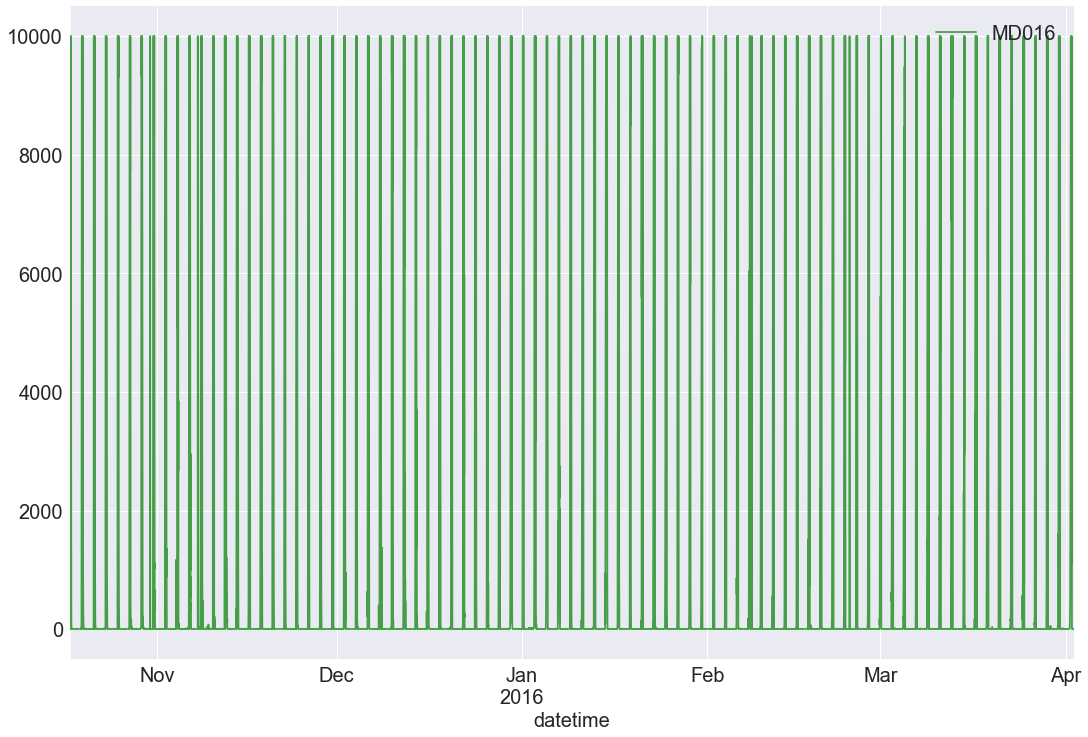

In [42]:
modified_target.plot(figsize=(18,12), alpha=0.7, color = 'green')
#df_target[predict_idx].plot(figsize=(8,6))
plt.xlabel('datetime', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(prop={'size': 20}, loc=1)

In [43]:
df_prediction = pd.Series(prediction, index = resampled_context[predict_idx].index)
df_prediction.head()

utc
2016-04-06 00:00:00    9778.659792
2016-04-06 00:15:00    9127.719922
2016-04-06 00:30:00    6722.700798
2016-04-06 00:45:00    1399.823652
2016-04-06 01:00:00     867.669550
Freq: 15T, dtype: float64

In [44]:
df_target.index.name = 'utc'
df_target[predict_idx].head()
type(df_target[predict_idx]['MD016'])

pandas.core.series.Series

In [45]:
type(modified_target)

pandas.core.frame.DataFrame

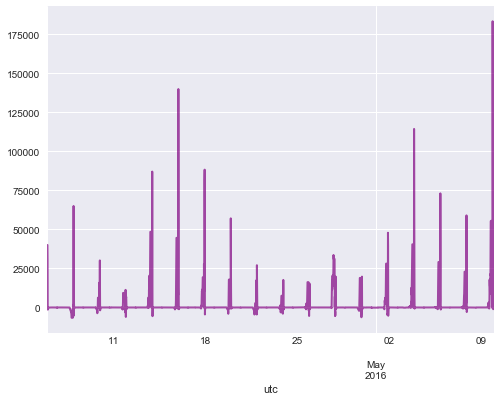

In [46]:
error = df_target[predict_idx]['MD016'] - df_prediction
error.plot(figsize=(8,6), linewidth=2, color='purple', alpha=0.7 )

In [47]:
#error.plot()

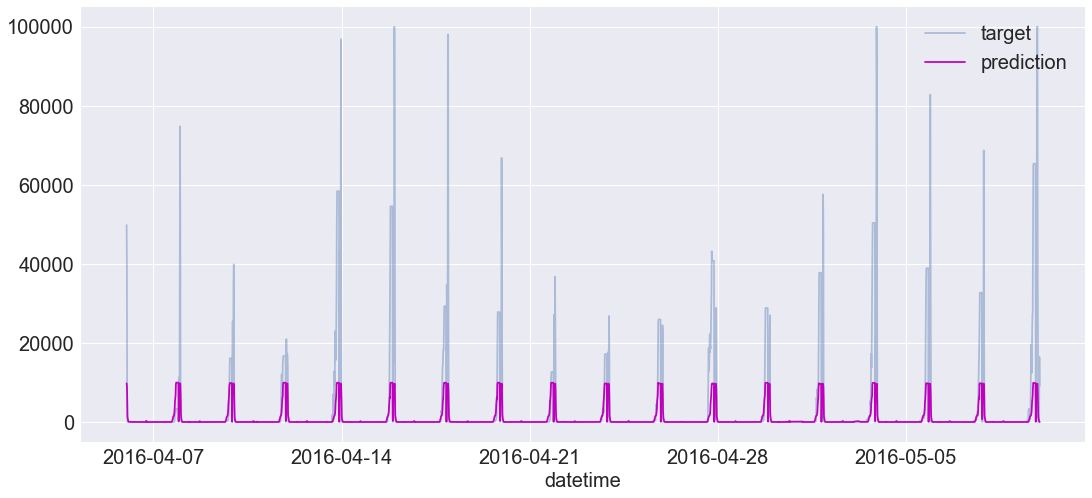

In [48]:
plt.figure(figsize = (18,8))
modified_target_prediction = df_target[predict_idx].copy()
modified_target_prediction['MD016'][modified_target_prediction['MD016'] > 100000] = 100000
plt.plot(resampled_context[predict_idx].index, modified_target_prediction.values, label='target', alpha = 0.4)
plt.plot(resampled_context[predict_idx].index, prediction, label='prediction', color = 'm')
plt.xlabel('datetime', fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(prop={'size': 20}, loc=1)

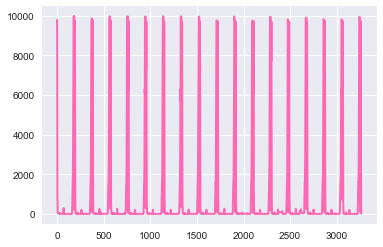

In [49]:
plt.plot(prediction, color='hotpink', linewidth=2)

In [50]:
mse = (error**2).mean()
np.sqrt(mse)

9643.956850580269

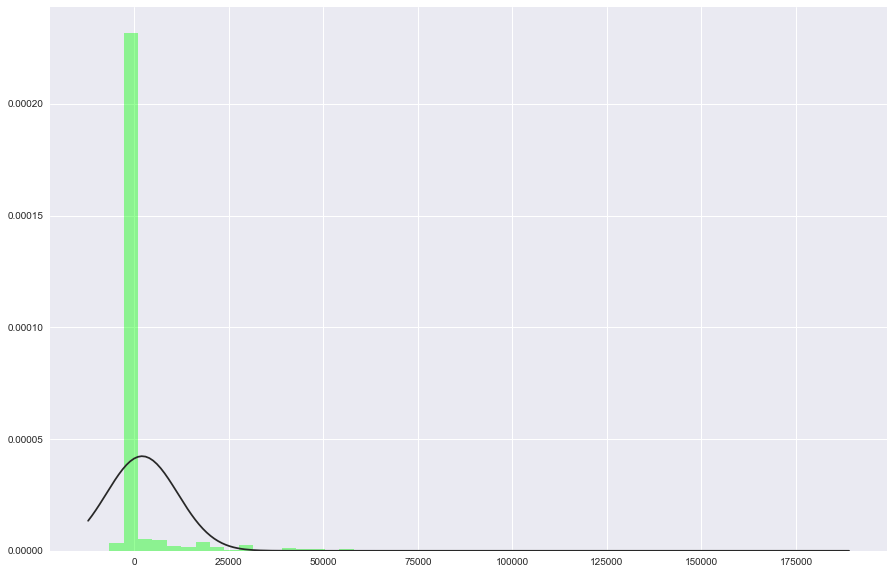

In [51]:
from scipy.stats import norm
F2  = sns.distplot(error, fit=norm, kde=False, color="lime")
F2.axes.get_figure().set_size_inches(15,10)

In [52]:
print("Contribution of features as returned by the Random Forest Regressor:")
for feature, importance in sorted(zip(rf.feature_importances_, resampled_context[training_idx].columns), key=lambda x: x[0], reverse=True):
    print(str(feature)+", "+str(importance))

Contribution of features as returned by the Random Forest Regressor:
0.878464767039, pseudo_altitude
0.0454473817853, vx
0.0450944503399, rx
0.0159689423434, ry
0.00649398169655, vz
0.0038526185726, rz
0.00169358402868, vy
0.000996597598072, PA_rad
0.000886003843118, DEC_rad
0.000796393302285, ROLL_ANGLE
0.000301572706142, RA_rad
3.62505598677e-06, umbra
8.16889339687e-08, penumbra


# Visualization of Leaf Nodes in Random Forest

In [53]:
# Tree Leaf Depth
from sklearn.tree import _tree

def leaf_depths(tree, node_id = 0):

     left_child = tree.children_left[node_id]# pairnei tin ID gia to aristero child tou node me ID node_ID
     right_child = tree.children_right[node_id]# pairnei tin ID gia to deksi child tou node me ID node_ID

     if left_child == _tree.TREE_LEAF:
         
         depths = np.array([0])

     else:

         left_depths = leaf_depths(tree, left_child) + 1        
         right_depths = leaf_depths(tree, right_child) + 1 
 
         depths = np.append(left_depths, right_depths)

     return depths
   

In [54]:
# Number of samples in a leaf 

def leaf_samples(tree, node_id = 0):
    
     left_child = tree.children_left[node_id]
     right_child = tree.children_right[node_id]

     if left_child == _tree.TREE_LEAF:
        
         samples = np.array([tree.n_node_samples[node_id]])

     else:
        
         left_samples = leaf_samples(tree, left_child)
         right_samples = leaf_samples(tree, right_child)

         samples = np.append(left_samples, right_samples)

     return samples

In [55]:
# Horizontal axis is the level/depth
# Vertical axis is how many nodes live at that level/depth
def draw_tree(ensemble, tree_id=0):

     plt.figure(figsize=(12,8))
     plt.subplot(211)

     tree = ensemble.estimators_[tree_id].tree_

     depths = leaf_depths(tree)
     plt.hist(depths, histtype='step', color= 'blue', 
              bins=range(min(depths), max(depths)+1), linewidth=2)

     plt.xlabel("Depth of leaf nodes (tree %s)" % tree_id)
    
     plt.subplot(212)
    
     samples = leaf_samples(tree)
     plt.hist(samples, histtype='step', color='magenta', 
              bins=range(min(samples), max(samples)+1),linewidth=2)
    
     plt.xlabel("Number of samples in leaf nodes (tree %s)" % tree_id)
   
     plt.show()

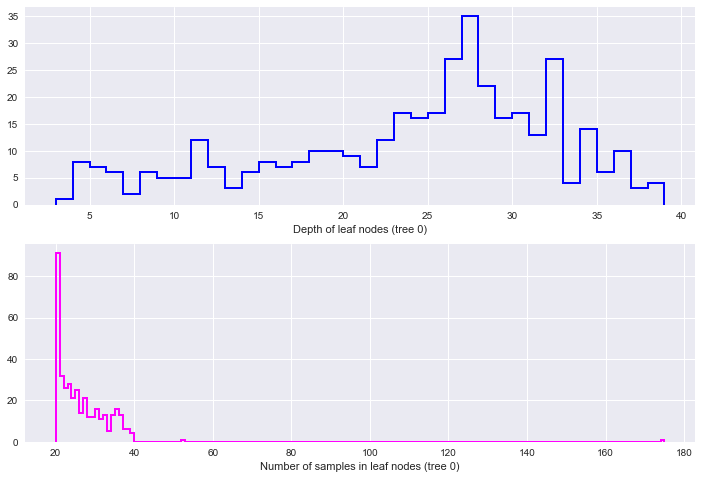

In [56]:
draw_tree(rf)

# Draw Random Forest

In [57]:
def draw_ensemble(ensemble):

     plt.figure(figsize=(20,10))
     plt.subplot(211)

     depths_all = np.array([], dtype=int)

     for x in ensemble.estimators_:
         tree = x.tree_
         depths = leaf_depths(tree)
         depths_all = np.append(depths_all, depths)
         plt.hist(depths, histtype='step', color='lime', 
                  bins=range(min(depths), max(depths)+1))

     plt.hist(depths_all, histtype='step', color='green', 
              bins=range(min(depths_all), max(depths_all)+1), 
              weights=np.ones(len(depths_all))/len(ensemble.estimators_), 
              linewidth=2)
     plt.xlabel("Depth of leaf nodes")
    
     samples_all = np.array([], dtype=int)
    
     plt.subplot(212)
    
     for x in ensemble.estimators_:
         tree = x.tree_
         samples = leaf_samples(tree)
         samples_all = np.append(samples_all, samples)
         plt.hist(samples, histtype='step', color='blue', alpha=0.6,
                  
                  bins=range(min(samples), max(samples)+1))
    
     plt.hist(samples_all, histtype='step', color='navy', 
              bins=range(min(samples_all), max(samples_all)+1), 
              weights=np.ones(len(samples_all))/len(ensemble.estimators_), 
              linewidth=2)
     plt.xlabel("Number of samples in leaf nodes")
    
     plt.show()

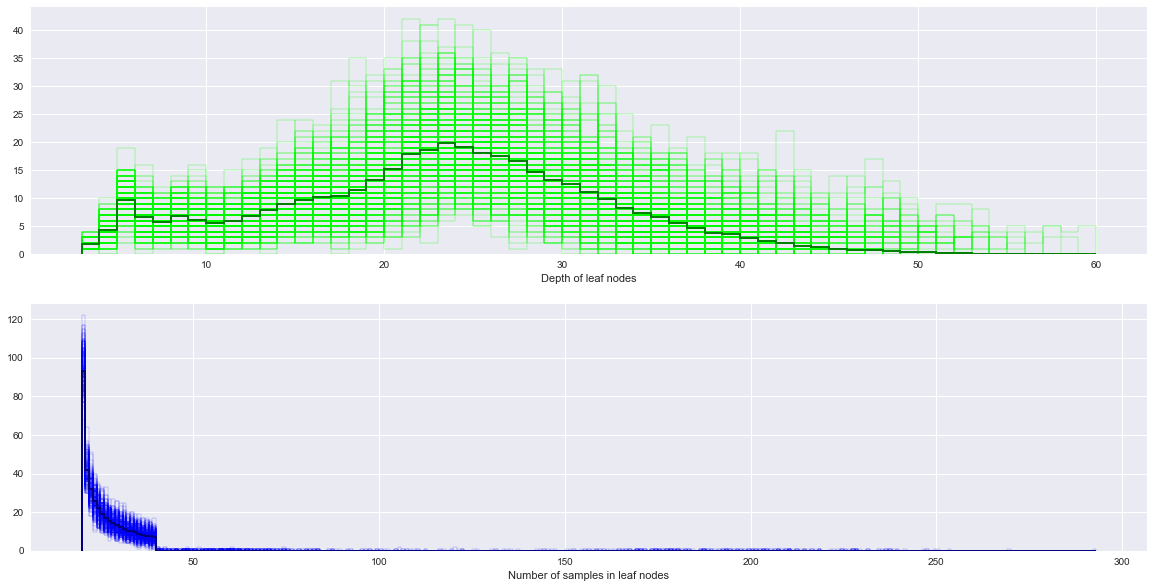

In [58]:
draw_ensemble(rf)

/opt/jupyter/anaconda3/envs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/opt/jupyter/anaconda3/envs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


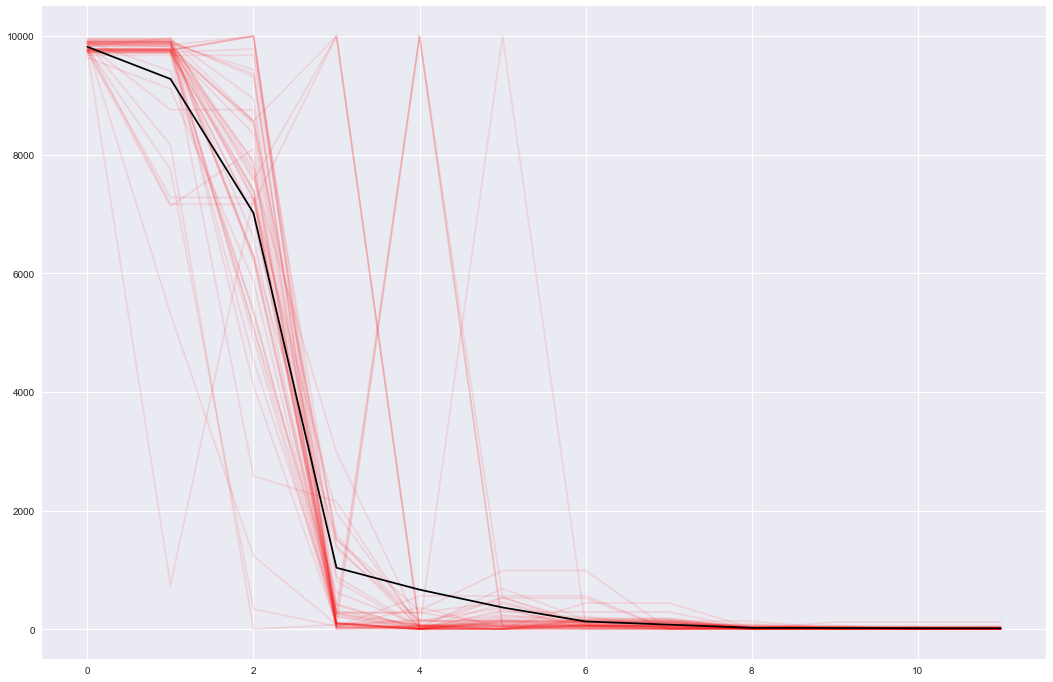

In [59]:
rf = RandomForestRegressor(n_estimators=50, n_jobs=-1, max_depth=10)
rf.fit(resampled_context[training_idx], modified_target)

plt.figure(figsize=(18,12))
predictions = None
for tree in rf.estimators_:
    ptree = tree.predict(resampled_context[predict_idx])
    if predictions == None:
        predictions = ptree
    else:
        predictions = np.concatenate((predictions, ptree))
    plt.plot(ptree[0:12], alpha=0.1, color='red')
#predictions = for_median.reshape( (-1, len(resampled_context[predict_idx])) )    
predictions = predictions.reshape( (-1, len(resampled_context[predict_idx])) )
prf = rf.predict(resampled_context[predict_idx])
plt.plot(prf[0:12], alpha=1, color='k')

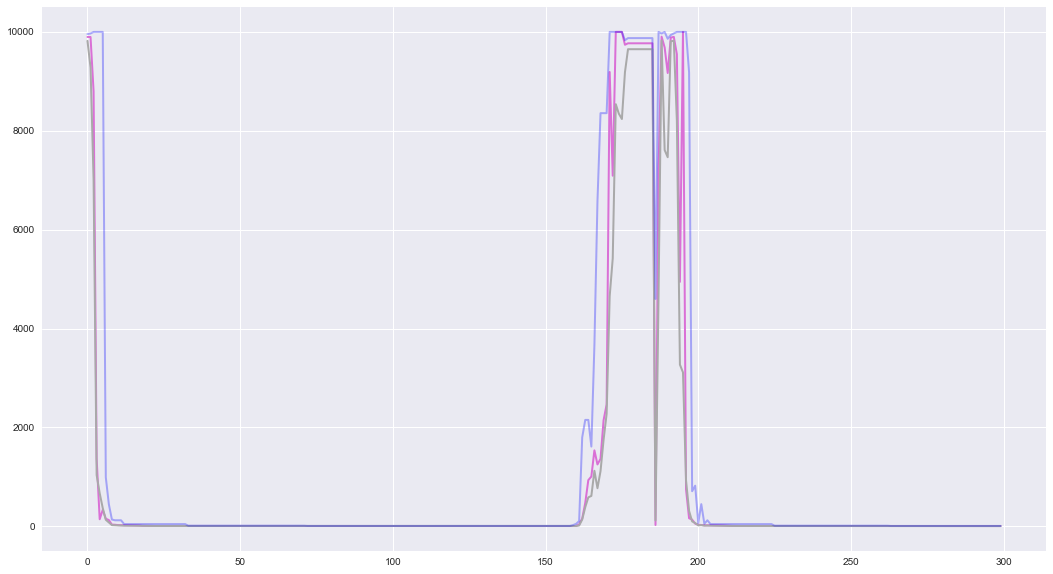

In [60]:
median = np.percentile(predictions, 80, axis=0)
worst = np.max(predictions, axis=0)

plt.figure(figsize=(18,10))
plt.plot(median[0:300], alpha=1, color='orchid',linewidth=2)
prf = rf.predict(resampled_context[predict_idx])
plt.plot(prf[0:300], alpha=1, color='darkgray',linewidth=2)                            
plt.plot(worst[0:300], alpha=0.3, color='blue',linewidth=2)                            


# Trees by depth and sample cardinality per node

## By max depth of the tree

In [61]:
tree = rf.estimators_[2]

/opt/jupyter/anaconda3/envs/deeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


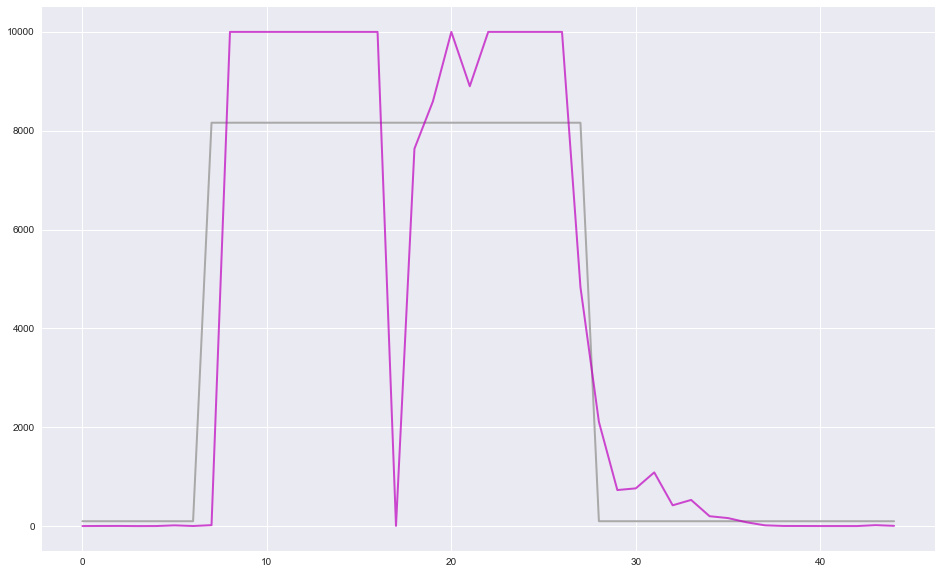

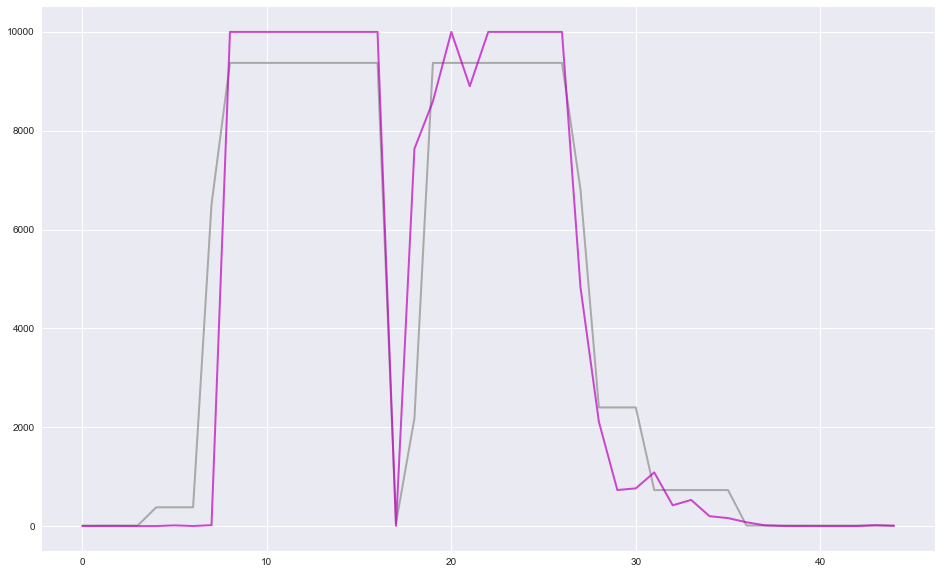

In [62]:
rf.fit(resampled_context[training_idx], modified_target)

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

#convert to data.frame to have the dates on xaxis

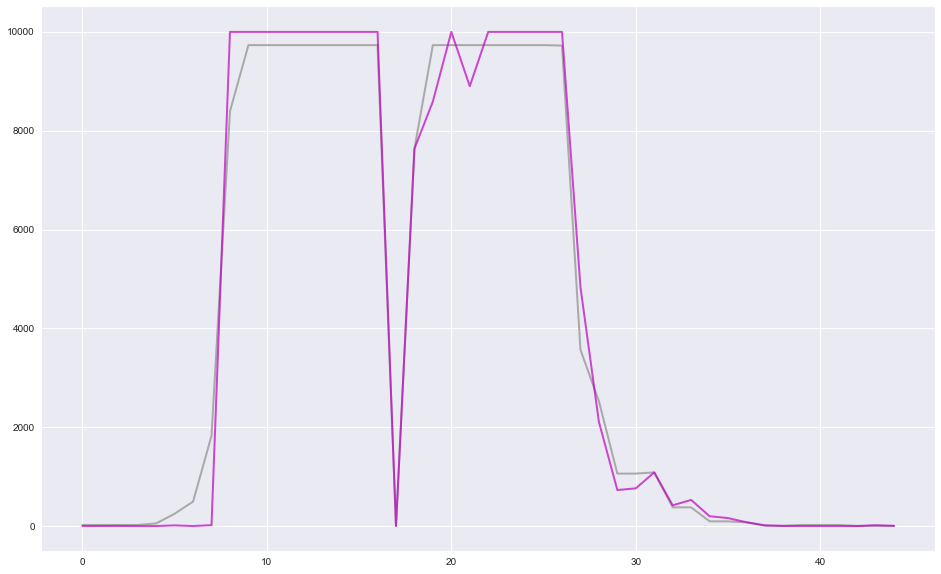

In [63]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target[375:420].values, color='m', alpha=0.7, linewidth=2)

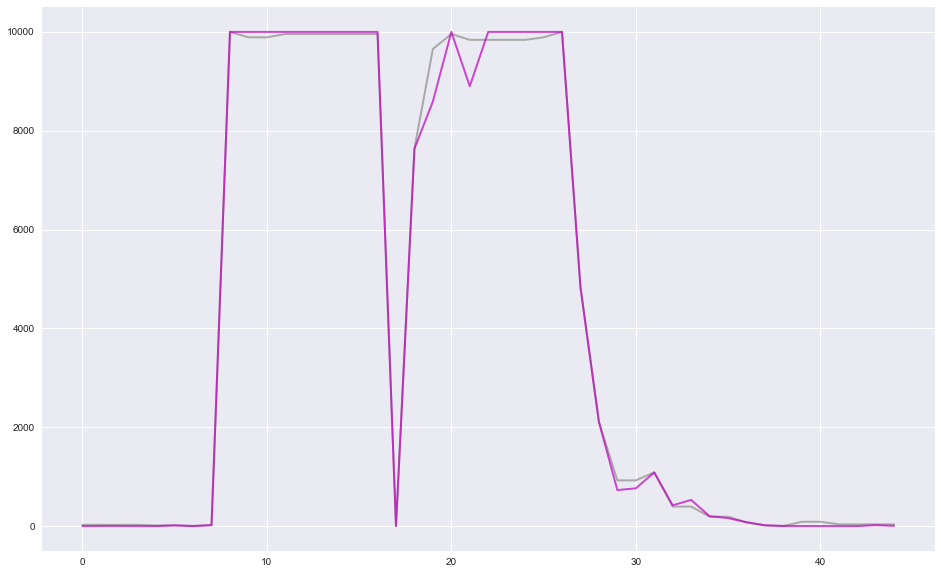

In [64]:
tree = DecisionTreeRegressor(max_depth=15)
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

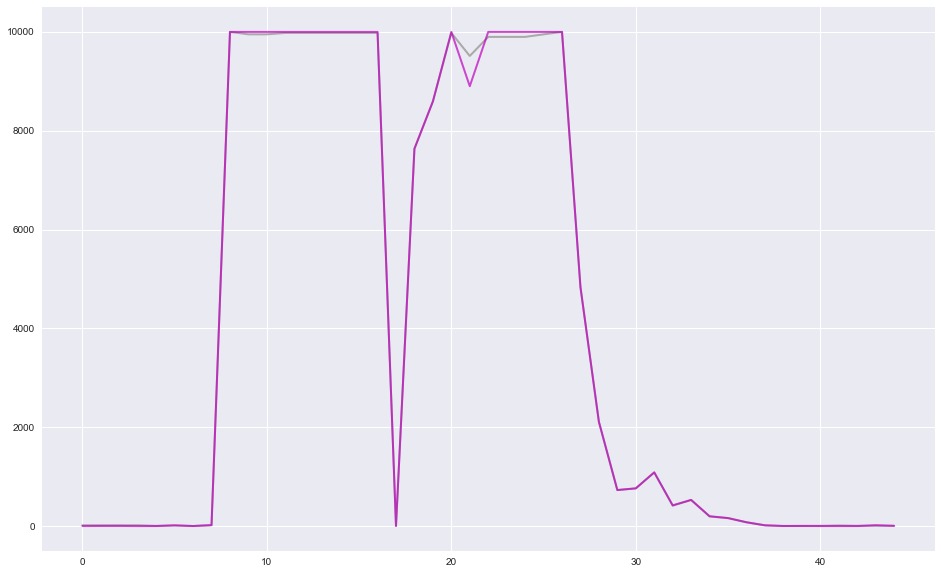

In [65]:
tree = DecisionTreeRegressor(max_depth=17)
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

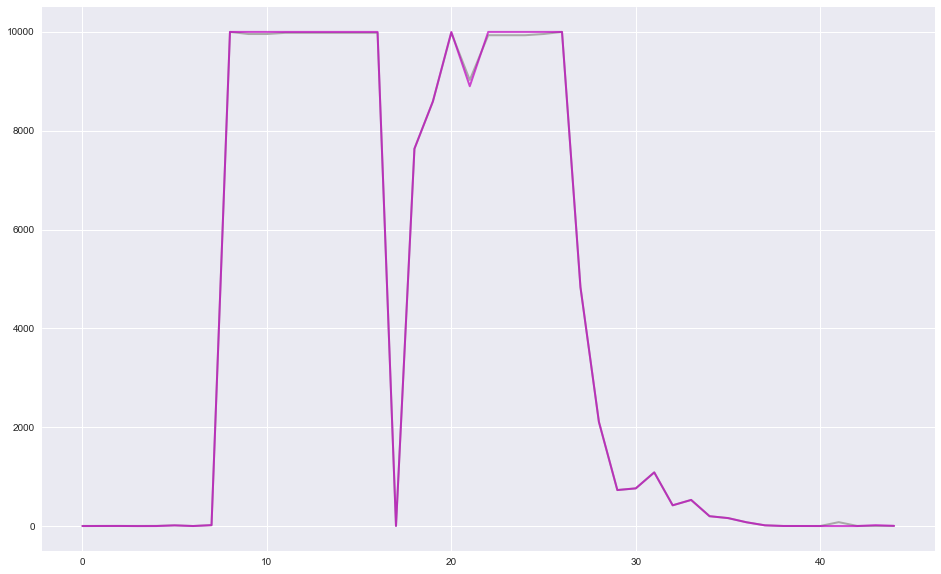

In [66]:
tree = DecisionTreeRegressor(max_depth=18)
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

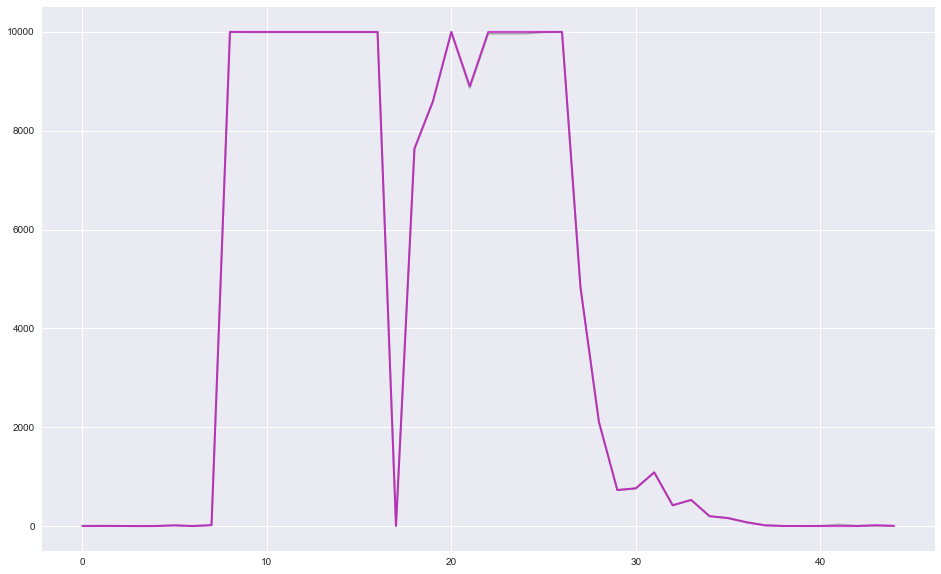

In [67]:
tree = DecisionTreeRegressor(max_depth=19)
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

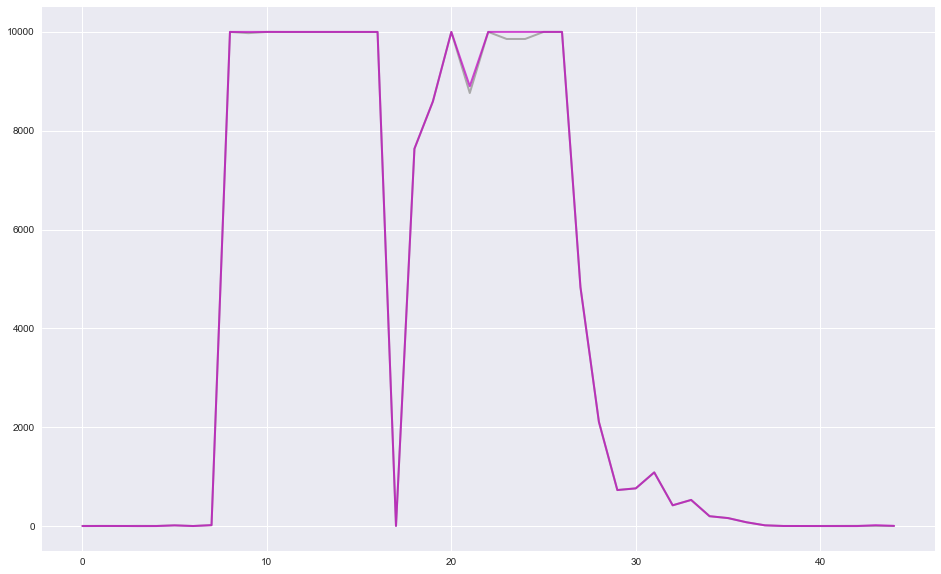

In [68]:
tree = DecisionTreeRegressor(max_depth=20)
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

## By min number of samples per leaf

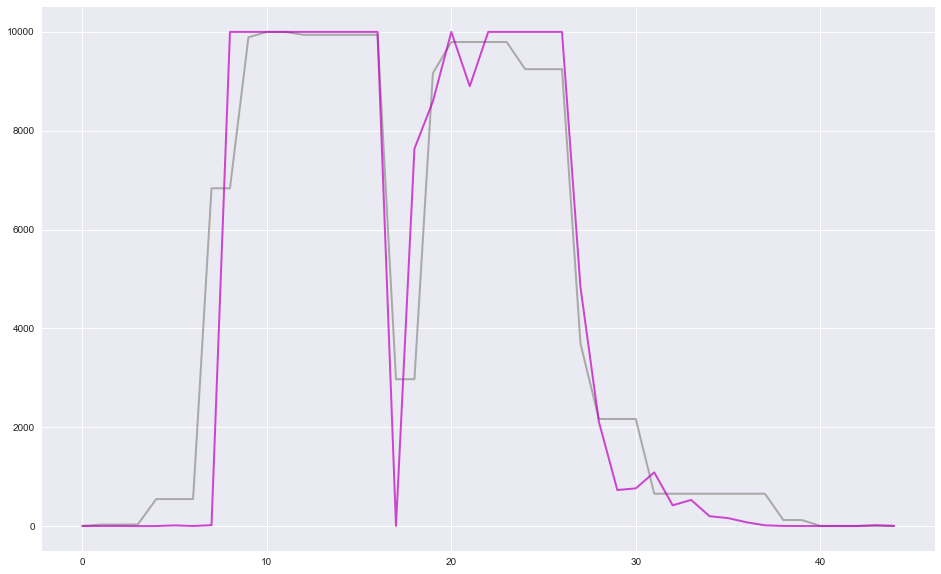

In [69]:
tree = DecisionTreeRegressor(min_samples_leaf=(150))
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

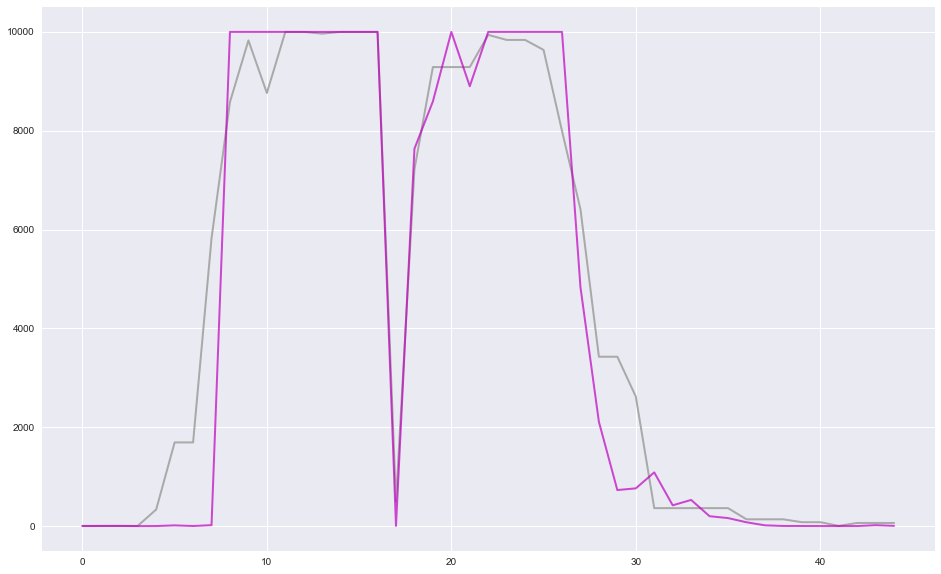

In [70]:
tree = DecisionTreeRegressor(min_samples_leaf=(50))
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

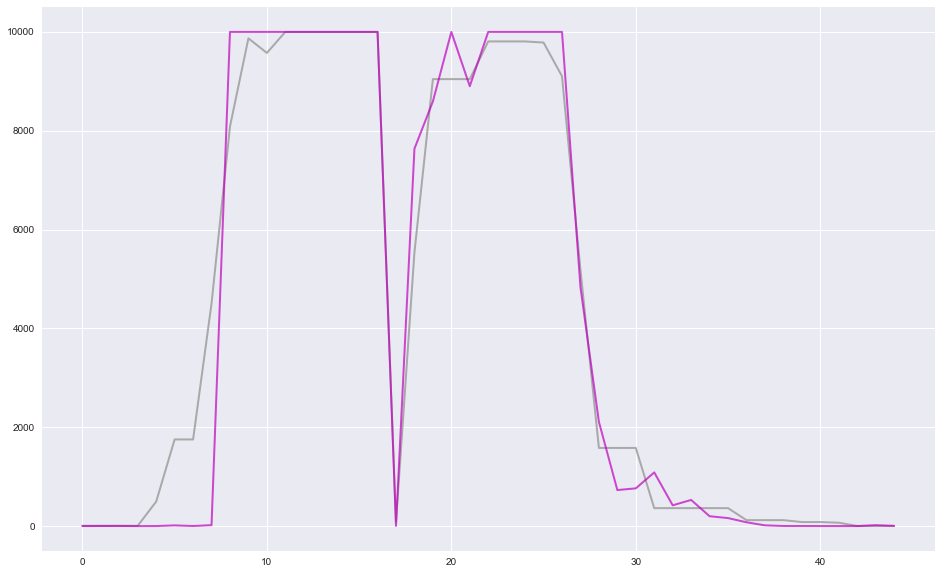

In [71]:
tree = DecisionTreeRegressor(min_samples_leaf=(30))
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

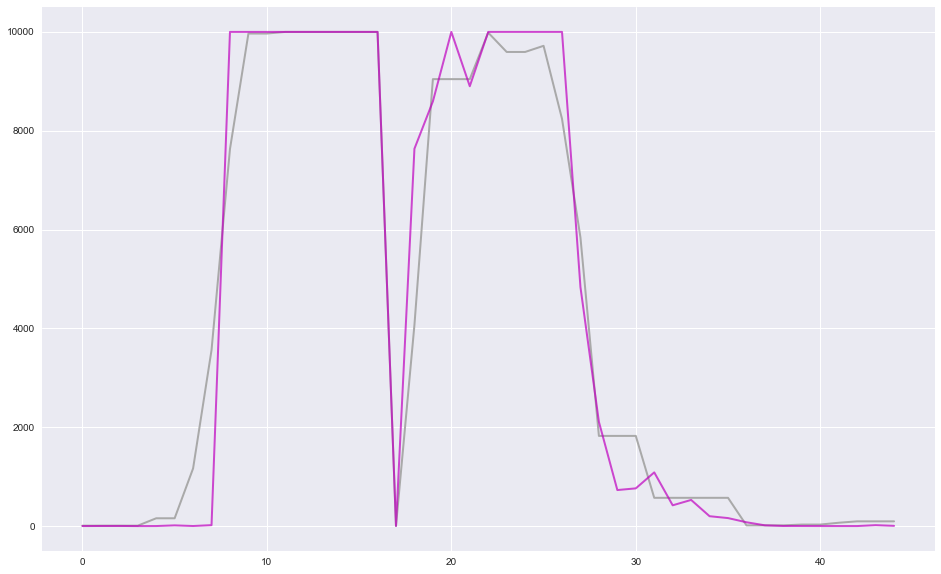

In [72]:
tree = DecisionTreeRegressor(min_samples_leaf=(20))
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

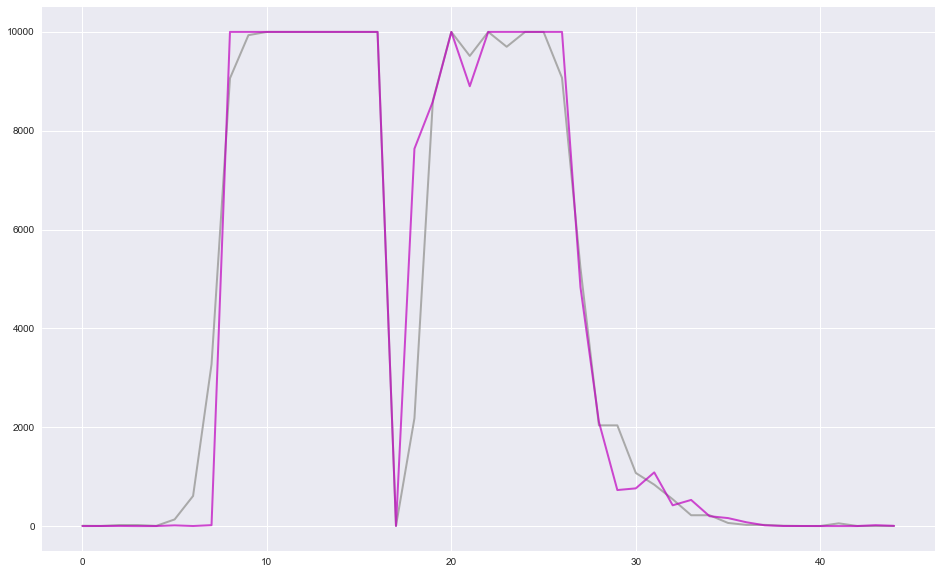

In [73]:
tree = DecisionTreeRegressor(min_samples_leaf=(10))
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

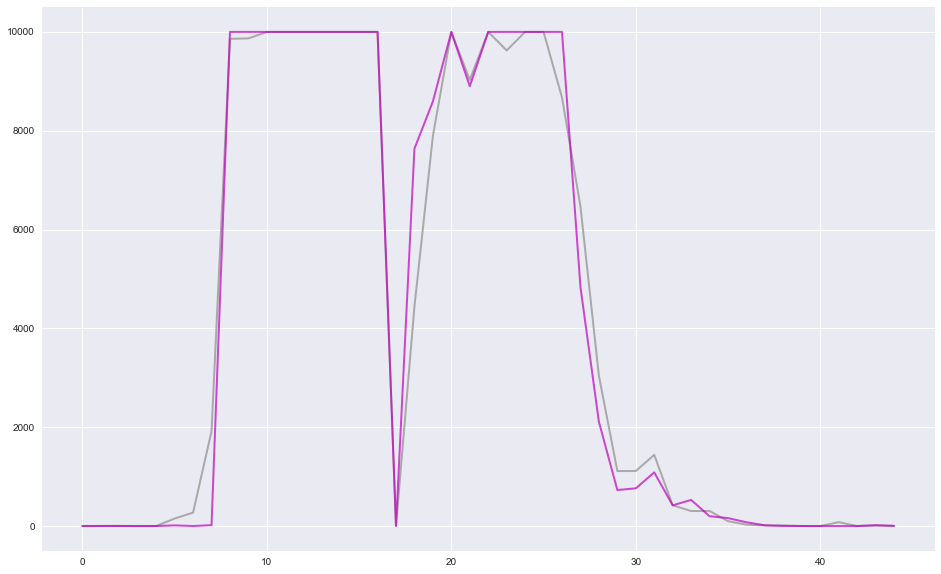

In [74]:
tree = DecisionTreeRegressor(min_samples_leaf=(5))
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

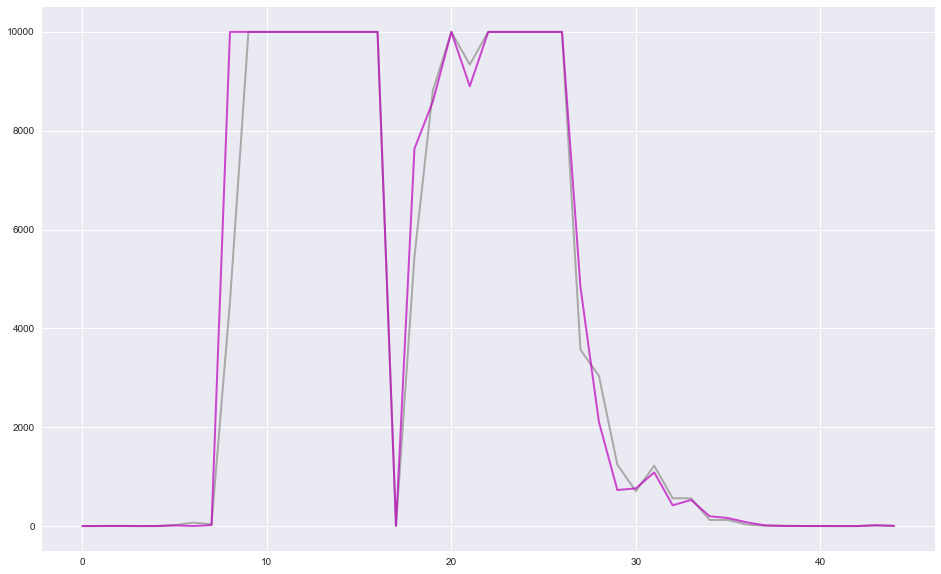

In [75]:
tree = DecisionTreeRegressor(min_samples_leaf=(3))
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

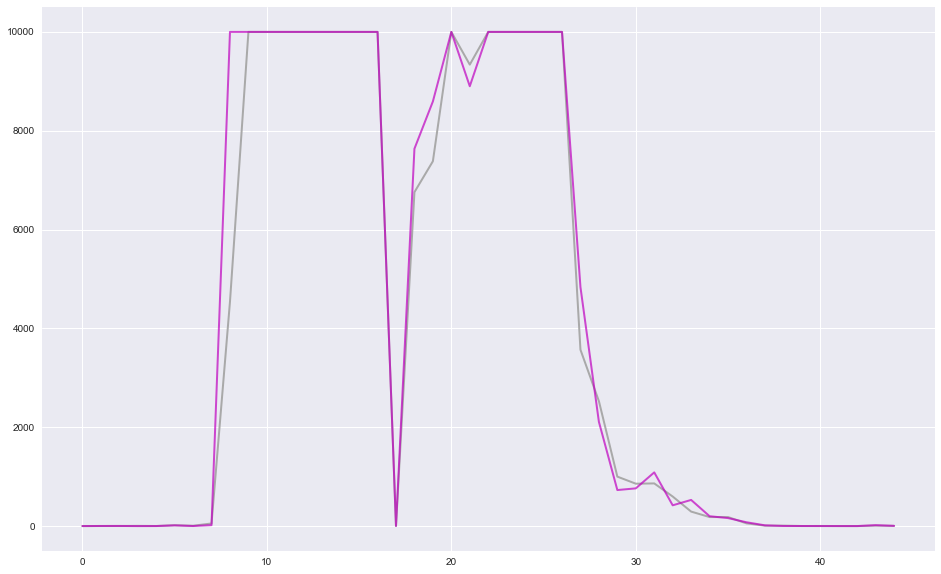

In [76]:
tree = DecisionTreeRegressor(min_samples_leaf=(2))
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

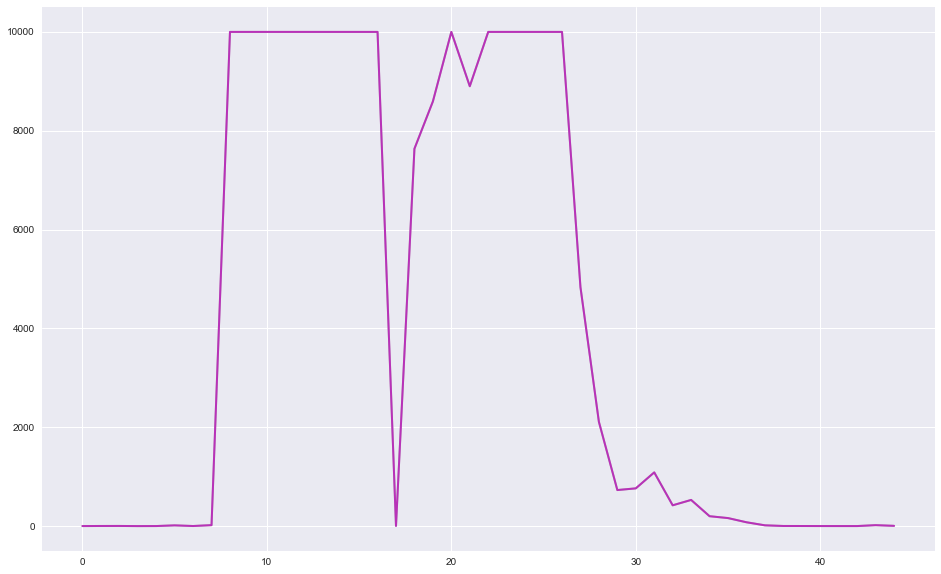

In [77]:
tree = DecisionTreeRegressor(min_samples_leaf=(1))
tree.fit(resampled_context[training_idx], modified_target)

tprediction = tree.predict(resampled_context[training_idx])
plt.figure(figsize=(16,10))
plt.plot(tprediction[375:420], color='darkgrey', linewidth=2)
plt.plot(modified_target.values[375:420], color='m', alpha=0.7, linewidth=2)

In [78]:
for feature, importance in sorted(zip(tree.feature_importances_, resampled_context[training_idx].columns), key=lambda x: x[0], reverse=True):
    print(str(feature)+", "+str(importance))

0.818324469461, pseudo_altitude
0.0542186788781, rx
0.0487688217104, vx
0.0301797295692, ry
0.0115206633159, vz
0.0113443654933, rz
0.0103671271773, vy
0.0058288955626, PA_rad
0.00392275299627, RA_rad
0.0028057980264, DEC_rad
0.00266270026069, ROLL_ANGLE
5.59975486935e-05, penumbra
0.0, umbra
